In [16]:
import random
import matplotlib.pyplot as plt
import numpy as np

# 0.5 for for exaltation fodder
# 0.3 for normal exaltation stone
# 0.7 for intermediate exaltation stone
# 0.95 for advanced exaltation stone
# 0.3 for radiant exaltation stone
BASE_SUCCESS_RATE = 0.5

class Exalt:
    
    def __init__(self):
        self.fail_count = 0
        self.success_count = 0
        self.additional_chance = 0
        self.failure_reduce_attempt = 0
        self.exalt_attempt = 0
        self.cummulative_fail = 0
    
    def rng(self):
        return random.random()
    
    def exalt(self, verbose=False):
        success_rate = BASE_SUCCESS_RATE + self.additional_chance
        self.exalt_attempt += 1
        if self.rng() < success_rate:
            self.success_count += 1
            self.additional_chance = 0
            if verbose: 
                print(f"Exalt success ({success_rate}). \tItem level {30 + self.success_count * 2}. \tFail count {self.fail_count}/5")
        else:
            self.fail_count += 1
            self.cummulative_fail += 1
            self.additional_chance += 0.05
            if verbose: 
                print(f"Exalt fail ({success_rate}). \tItem level {30 + self.success_count * 2}. \tFail count {self.fail_count}/5")
                
    def failure_reduce(self, chance=0.2, verbose=False):
        self.failure_reduce_attempt += 1
        if self.rng() < chance:
            self.fail_count -= 1
            if verbose: print(f"Reduced failure count by 1: Fail count {self.fail_count}/5")

In [17]:
item = Exalt()
while item.success_count != 5:
    while item.fail_count == 5:
        item.failure_reduce(verbose=True)
    item.exalt(verbose=True)
    
print(f"""Item reached 5 success:
exaltation attempt: {item.exalt_attempt}
exaltation fail: {item.cummulative_fail}
failure reduction attempt: {item.failure_reduce_attempt}""")

Exalt success (0.5). 	Item level 32. 	Fail count 0/5
Exalt success (0.5). 	Item level 34. 	Fail count 0/5
Exalt success (0.5). 	Item level 36. 	Fail count 0/5
Exalt fail (0.5). 	Item level 36. 	Fail count 1/5
Exalt success (0.55). 	Item level 38. 	Fail count 1/5
Exalt success (0.5). 	Item level 40. 	Fail count 1/5
Item reached 5 success:
exaltation attempt: 6
exaltation fail: 1
failure reduction attempt: 0


In [39]:
total_trial = 10000
total_passes = []
total_fails = []
fail_reduces = []
for i in range(total_trial):
    total_pass = 0
    total_fail = 0
    fail_reduce = 0
    item = Exalt()
    for j in range(42):
        if item.success_count == 5:
            item.fail_count = 0
            item.success_count = 0
        while item.fail_count == 5:
            item.failure_reduce()
        item.exalt(verbose=False)
    total_passes.append(item.exalt_attempt)
    total_fails.append(item.cummulative_fail)
np.mean(total_fails)

19.445

In [40]:
# failing 20 in 42 attempts places at 55th percentile
np.percentile(total_fails, 55)

20.0

#### Distribution of Exatation Attempts, Reduction Attempt to Reach Lv40

In [3]:
total_trial = 100000

exalt_attempt = np.zeros(total_trial)
reduce_attempt = np.zeros(total_trial)
cum_fail_count = np.zeros(total_trial)

for i in range(total_trial):
    item = Exalt()
    while item.success_count != 5:
        while item.fail_count == 5:
            item.failure_reduce()
        item.exalt()
    exalt_attempt[i] = item.exalt_attempt
    reduce_attempt[i] = item.failure_reduce_attempt
    cum_fail_count[i] = item.cummulative_fail

avg exaltation attempt: 13.55756
std exaltation attempt: 3.8080476423490293
13.98% will reach 5 success before 5 fail


Text(0.5, 1.0, 'Exaltation Attempt')

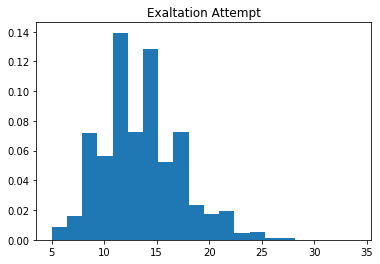

In [4]:
print(f"avg exaltation attempt: {np.mean(exalt_attempt)}")
print(f"std exaltation attempt: {np.std(exalt_attempt)}")
print("%.2f%% will reach 5 success before 5 fail"%(100*np.mean(exalt_attempt<10)))
plt.hist(exalt_attempt, bins=20, density=True)
plt.title("Exaltation Attempt")

avg exaltation fail reduce attempt: 23.4181
std exaltation fail reduce attempt: 20.521337977578362


Text(0.5, 1.0, 'Exaltation Failure Reduction')

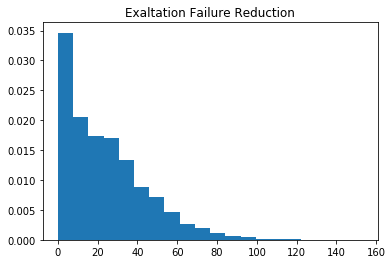

In [5]:
print(f"avg exaltation fail reduce attempt: {np.mean(reduce_attempt)}")
print(f"std exaltation fail reduce attempt: {np.std(reduce_attempt)}")
plt.hist(reduce_attempt, bins=20, density=True)
plt.title("Exaltation Failure Reduction")

avg exaltation fail: 8.55756
std exaltation fail: 3.8080476423490293


Text(0.5, 1.0, 'Exaltation Fail')

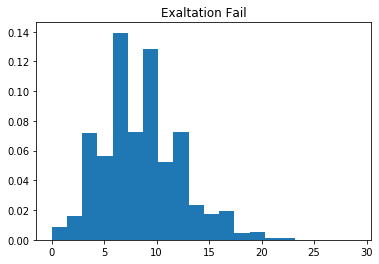

In [6]:
print(f"avg exaltation fail: {np.mean(cum_fail_count)}")
print(f"std exaltation fail: {np.std(cum_fail_count)}")
plt.hist(cum_fail_count, bins=20, density=True)
plt.title("Exaltation Fail")

#### 57.76% of equipment will reach lv40 before 5/5 fail

In [7]:
total_trial = 1000000
lv40_count = 0
fail_5_count = 0

success_arr = np.zeros(total_trial)
fail_arr = np.zeros(total_trial)

lv40_total_exalt_count = []
fail5_total_exalt_count = []

for i in range(total_trial):
    item = Exalt()
    while max(item.success_count, item.fail_count) != 5:
        item.exalt(verbose=False)
        
    if item.success_count == 5:
        lv40_count += 1
        lv40_total_exalt_count.append(item.success_count + item.fail_count)
    elif item.fail_count == 5:
        fail_5_count += 1
        fail5_total_exalt_count.append(item.success_count + item.fail_count)
    
    success_arr[i] = item.success_count
    fail_arr[i] = item.fail_count

total_exalt_arr = success_arr + fail_arr
print(f"{100 * lv40_count / total_trial}% of equipment will reach lv40 before 5/5 fail")

14.1168% of equipment will reach lv40 before 5/5 fail


average: 8.082851637764932


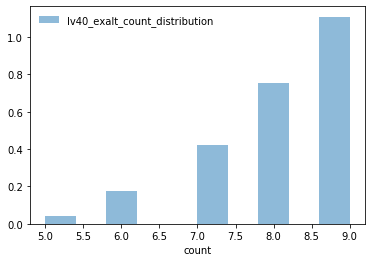

In [8]:
plt.hist(lv40_total_exalt_count, density=True, alpha=0.5, label='lv40_exalt_count_distribution')
print(f"average: {np.mean(lv40_total_exalt_count)}")
plt.xlabel("count")
plt.legend(frameon=False)

average: 7.089022067179611


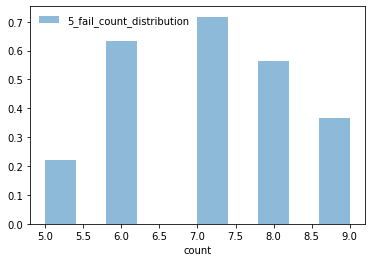

In [9]:
plt.hist(fail5_total_exalt_count, density=True, alpha=0.5, label='5_fail_count_distribution')
print(f"average: {np.mean(fail5_total_exalt_count)}")
plt.xlabel("count")
plt.legend(frameon=False)

average: 7.229319


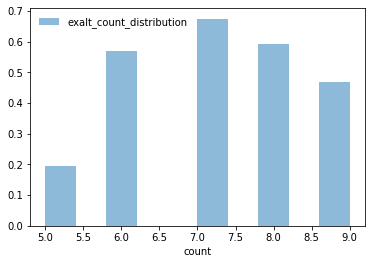

In [10]:
plt.hist(total_exalt_arr, density=True, alpha=0.5, label='exalt_count_distribution')
print(f"average: {np.mean(total_exalt_arr)}")
plt.xlabel("count")
plt.legend(frameon=False)

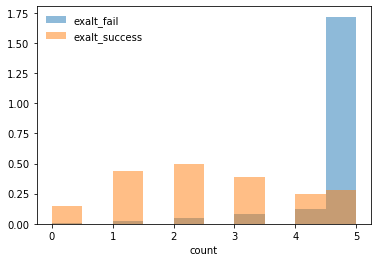

In [11]:
plt.hist(fail_arr, density=True, alpha=0.5, label='exalt_fail')
plt.hist(success_arr, density=True, alpha=0.5, label='exalt_success')
plt.xlabel("count")
plt.legend(frameon=False)

#### Failing 5 Exalt in a Row

In [12]:
trial = 1000000
failed_5_in_a_row = 0
for i in range(trial):
    item = Exalt()
    for j in range(5):
        item.exalt()
    if item.fail_count == 5:
        failed_5_in_a_row += 1
        
print(f"probability of 5 fail in a row: {failed_5_in_a_row / trial}")

probability of 5 fail in a row: 0.075073


In [13]:
0.5 * 0.45 * 0.4 * 0.35 * 0.3

0.00945